In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

%matplotlib inline

#np.random.seed(1)

In [2]:
def sample_GP(x, mu, length_scale, num_samples):
    # compute covariance matrix
    K = np.exp(-cdist(x, x)**2 / length_scale**2)
    
    # now we have the mean function and the covariance funciton, the GP is fully described
    g_prior = np.random.multivariate_normal(mu.flatten(), K, num_samples)
    
    return g_prior.T

Text(0,0.5,'y')

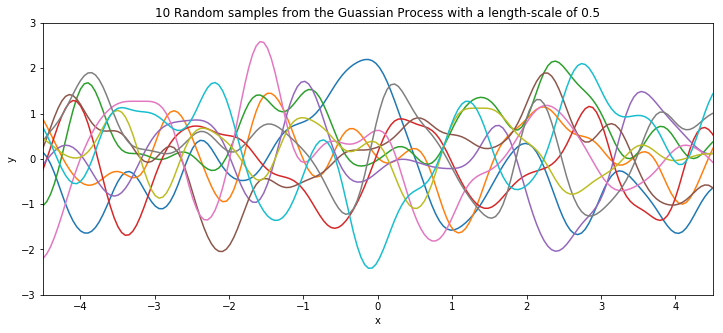

In [3]:
#######################
######### 13 ##########
#######################

# create data
x = np.linspace(-5, 5, 200)
x = x.reshape(-1, 1)

# choose average y value, in this case 0
mu = np.zeros(x.shape)

# choose length-scale to use in covariance matrix
length_scale = 0.5

# choose number of samples we want to take (and display)
N = 10

g_prior = sample_GP(x, mu, length_scale, N)

# plot the data
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_title("{0} Random samples from the Guassian Process with a length-scale of {1}".format(N, length_scale))
ax.plot(x, g_prior)
ax.axis([-4.5, 4.5, -3, 3])
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

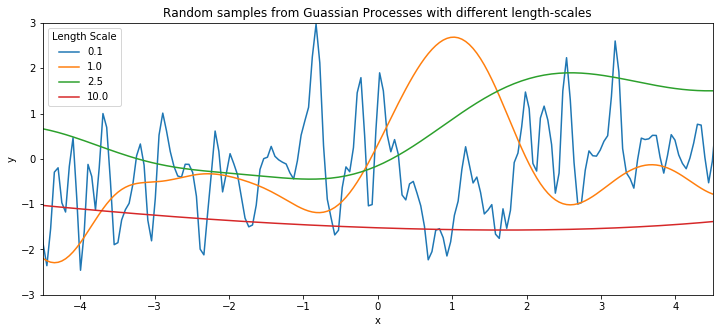

In [4]:
#######################
######## 13.3 #########
#######################

# change length-scale
length_scales = np.array([0.1, 1.0, 2.5, 10])

# change number of samples
N = 1

gps = []
for length_scale in length_scales:
    gps.append(sample_GP(x, mu, length_scale, N))

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_title("Random samples from Guassian Processes with different length-scales")
for idx, g_prior in enumerate(gps):
    line, = ax.plot(x, g_prior, color="C" + str(idx), label=str(length_scales[idx]))
    
ax.legend(title="Length Scale", loc=0)
ax.axis([-4.5, 4.5, -3, 3])
plt.xlabel('x')
plt.ylabel('y')

In [5]:
# choose number of samples of x and length scale
N = 7
ls = 0.8
lines = 10000
samples = 1000

#######################
######## 14 ###########
#######################

def kernel(a, b, length_scale):
    # compute covariance matrix for a against b
    return np.exp(-cdist(a, b)**2 / length_scale**2)

# generate data for testing
x_test = np.linspace(-10, 10, samples).reshape(-1, 1)

# generate data for training
# generate noise
# create noisy sin wave from training data
x_train = np.array(random.sample(np.linspace(-np.pi,np.pi).tolist(), N)).reshape(-1, 1)
# x_train = np.random.randint(-5, 6, 7).reshape(-1, 1)


epsilon = np.random.normal(0, 0.5, len(x_train)).reshape(-1, 1)
y_train = np.sin(x_train) + epsilon

# choose alpha smoothing value
alpha = 0.00005

# distance measure for observed data
K = kernel(x_train, x_train, ls)
L = np.linalg.cholesky(K + alpha*np.identity(len(x_train)))

# compute mean at test points
K_s = kernel(x_train, x_test, ls)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((len(x_test),))
#print(mu)

# compute standard deviation, for plotting
K_ss = kernel(x_test, x_test, ls)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + alpha*np.identity(len(x_test)) - np.dot(Lk.T, Lk))
g_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(len(x_test), lines)))
#g_post = sample_GP(x_test, mu, ls, 4)

# calculate predictive mean & variance
# predict_mean = np.array([np.mean(x) for x in g_post])
# predict_var = np.array([np.var(x) for x in g_post])

Text(0,0.5,'y')

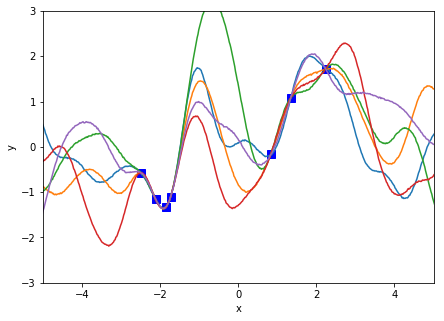

In [6]:
sample_lines = 5

# plot all this
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, 'bs', ms=8)
ax.plot(x_test, [y[:sample_lines] for y in g_post])
ax.axis([-5, 5, -3, 3])
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(x_train, y_train, 'bs', ms=8)
# plt.plot(x_test, [y[:sample_lines] for y in g_post])
# plt.axis([-5, 5, -3, 3])
# plt.title('{} samples from the GP posterior distribution'.format(int(sample_lines)))
# plt.show()

Text(0,0.5,'y')

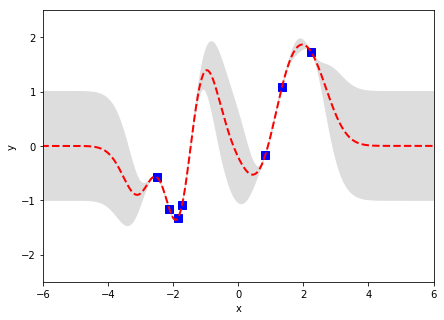

In [7]:
# plot all this
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, 'bs', ms=8)
#plt.plot(x_test, g_post)
plt.gca().fill_between(x_test.flat, mu-stdv**2, mu+stdv**2, color="#dddddd")
ax.plot(x_test, mu, 'r--', lw=2)
ax.axis([-6, 6, -2.5, 2.5])
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

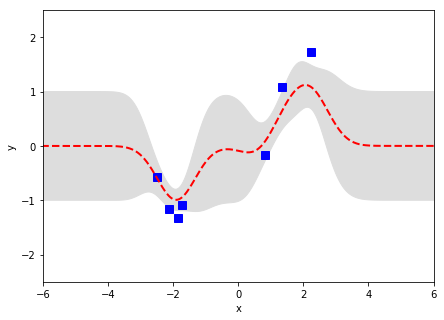

In [8]:
# choose alpha smoothing value
alpha = 0.00005

# distance measure for observed data
K = kernel(x_train, x_train, ls) + 0.7*np.identity(len(x_train))
L = np.linalg.cholesky(K + alpha*np.identity(len(x_train)))

# compute mean at test points
K_s = kernel(x_train, x_test, ls)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((len(x_test),))
#print(mu)

# compute standard deviation, for plotting
K_ss = kernel(x_test, x_test, ls)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + alpha*np.identity(len(x_test)) - np.dot(Lk.T, Lk))
g_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(len(x_test), lines)))

# plot all this
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, 'bs', ms=8)
#plt.plot(x_test, g_post)
plt.gca().fill_between(x_test.flat, mu-stdv**2, mu+stdv**2, color="#dddddd")
ax.plot(x_test, mu, 'r--', lw=2)
ax.axis([-6, 6, -2.5, 2.5])
plt.xlabel('x')
plt.ylabel('y')